In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin,cos

In [2]:
print(sin(pi))
#the problem is, pi in math is a float that's 3.14....sth, and it won't return exactly 0 but something very close to 0 at this point,
#however, considering that since my time values will basically be impossible equals exactly pi,it should be fine and accurate enough.

1.2246467991473532e-16


In [4]:
def rk45_lotka_volterra(func,tspan,y0,params):
    #func      the function used to describe the lotka volterra system
    #tspan     the interval of time
    #y0        initial conditions, should be an 1-d array of size (n,)
    #params      an array that should contain 4 parameters a,b,c,d
    #a           birth rate of rabbits
    #b           death rate of rabbits
    #c           bith rate of foxes
    #d           death rate of foxes
    sol=integrate.solve_ivp(func,tspan,y0,max_step=0.33,args=(params,))#I really don't understand this args=(params,)syntax, 
    #but it should be able to pass on the parameters, I don't understand why is it written in this way though, 
    #and why wouldn't it return some form of tuple.
    T=sol.t
    sol=sol.y #the values array for the species
    rabbit=sol[0]
    fox=sol[1]
    eagle=sol[2]
    time=T[-1]
    num_rabbit=rabbit[-1]
    num_fox=fox[-1]
    num_eagle=eagle[-1]
    print('at t=',time,', the number of the rabbits are',num_rabbit,', the number of the foxes are',num_fox,'the number of the eagles are',num_eagle)
    plt.plot(T,rabbit,'r')
    plt.plot(T,fox,'b')
    plt.plot(T,eagle,'g')
    plt.xlabel('time')
    plt.title('runge kutta method')
    plt.show

In [5]:
def func(t,y,params):#the function to describe the drabbits and dfoxes and deagles.
    #y           an array containing the 1) the number of rabbits 2) the number of foxes. 3) the number of eagles
    #params      an array that should contain 6 parameters a,b,c,d,e,f
    #a           initial birth rate of rabbits
    #b           initial death rate of rabbits eaten by foxes
    #c           initial bith rate of foxes
    #d           initial death rate of foxes eaten by eagles
    #e           initial birth rate of eagles
    #f           initial death rate of eagles
    #to involve a time factor, I am using sinusoidal functions, so the value of the constant will be oscillating in a range, I don't know how to scientifically explain
    #it though, I will make the period of the sinusoidal function 360 years, so that maybe for some constant, the first half of the year will increase and vice versa
    #for the second half of the year, like birthrate is high in the summer and low in the winter.
    a=params[0]
    da=0.02*sin((pi/180)*t) #doing so will make this constant's difference with it's initial value oscillating around [-2,2], and the period will be 360 days which is
    #roughly a year
    a=a+da
    b=params[1]
    db=-0.01*sin((pi/180)*t)
    b=b+db
    c=params[2]
    dc=0.015*sin((pi/180)*t)
    c=c+dc
    d=params[3]
    dd=0.01*sin((pi/180)*t)+0.01
    d=d+dd
    e=params[4]
    de=0.01*sin((pi/180)*t)
    e=e+de
    f=params[5]
    df=0.03*sin((pi/180)*t)
    f=f+df
    
    X=y[0]
    Y=y[1]
    Z=y[2]
    dx=(a*X)-(b*X*Y)
    dy=(c*X*Y)-(d*Y*Z)
    dz=(e*Y*Z)-(f*Z)
    return([dx,dy,dz])

at t= 200.0 , the number of the rabbits are 5.307417657173552 , the number of the foxes are 20.348611138553373 the number of the eagles are 0.12508365629238866


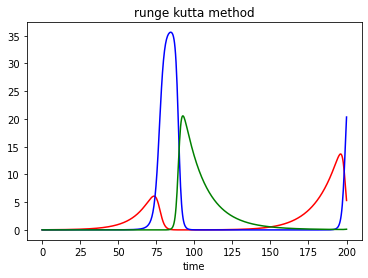

In [13]:
tspan=[0,200]
y0=[0.02,0.01,0.005]
params=[0.07,0.03,0.06,0.02,0.02,0.04]#I always think there is something about the equation, so C(the eating rate of foxes) should be proportional to rabbit/foxes,
#such that if there is more rabbit than foxes, eating rate will be higher, and if there is less rabbits than foxes, eating rate will be lower, instead of 
#proportional directly to XY, same for the eating rate of eagles. I think that would make the model a lot better and more accurate, my idea is something like
#eating rate = (c*y^2)/x
rk45_lotka_volterra(func,tspan,y0,params)

at t= 500.0 , the number of the rabbits are 3.21066249671832 , the number of the foxes are 2.0658750645719977e-15 the number of the eagles are 52.536856292942936


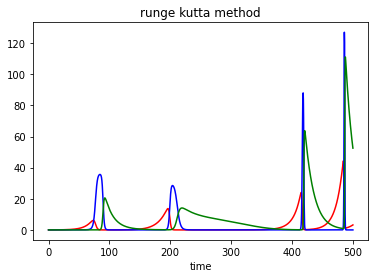

In [12]:
tspan=[0,500]
y0=[0.02,0.01,0.005]
params=[0.07,0.03,0.06,0.02,0.02,0.04]
rk45_lotka_volterra(func,tspan,y0,params)

In [14]:
#the larger the t is, the more unstable and less accurate the model is, next thing I am going to try is to make the eating rate of an animal inversely proportional to the percentage of two population
#and see what would happen